# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [105]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key
from api_keys import api_key2
from api_keys import api_key_kassy

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [106]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [107]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

In [108]:
# Build partial query URL
query_url = f"{url}appid={api_key}&q={city}"

In [109]:
print(requests.get(query_url).json())

{'coord': {'lon': 26.89, 'lat': -33.59}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 288.15, 'pressure': 1023, 'humidity': 85, 'temp_min': 288.15, 'temp_max': 288.15}, 'wind': {'speed': 0.45, 'deg': 259, 'gust': 2.24}, 'clouds': {'all': 85}, 'dt': 1556989299, 'sys': {'type': 3, 'id': 2011314, 'message': 0.0049, 'country': 'ZA', 'sunrise': 1556945310, 'sunset': 1556983794}, 'id': 964432, 'name': 'Port Alfred', 'cod': 200}


In [110]:
# Pretty Print the output of the JSON
response = requests.get(query_url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 85
    },
    "cod": 200,
    "coord": {
        "lat": -33.59,
        "lon": 26.89
    },
    "dt": 1556989299,
    "id": 964432,
    "main": {
        "humidity": 85,
        "pressure": 1023,
        "temp": 288.15,
        "temp_max": 288.15,
        "temp_min": 288.15
    },
    "name": "Port Alfred",
    "sys": {
        "country": "ZA",
        "id": 2011314,
        "message": 0.0049,
        "sunrise": 1556945310,
        "sunset": 1556983794,
        "type": 3
    },
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 259,
        "gust": 2.24,
        "speed": 0.45
    }
}


In [111]:
# Pretty print JSON for a specific city
#response = requests.get(url + "").json()

In [112]:
# create empty list for each variable
names = []
cloudinesses = []
countries = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []

In [113]:
# query gen
def querygen(api_key='', city = cities):
    url =  "http://api.openweathermap.org/data/2.5/weather"
    
    return f'{url}?q={city}&appid={api_key}&units=imperial'

In [114]:
for c in cities:
    # feed each city in cities into the API query_url
    response = requests.get(querygen(api_key = api_key, city = c)).json()
    counter = 1   # set counter for debugging purposes
    
    try:
            
        # pull individual values for each city
        name = response["name"]
        cloudiness = response["clouds"]["all"]
        country = response["sys"]["country"]
        date = response["dt"]
        humidity = response["main"]["humidity"]
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        wind_speed = response["wind"]["speed"]

        # add values to lists
        print(response['name'])
        names.append(name)
        cloudinesses.append(cloudiness)
        countries.append(country)
        dates.append(date)
        humidities.append(humidity)
        lats.append(lat)
        lngs.append(lng)
        max_temps.append(max_temp)
        wind_speeds.append(wind_speed)
    
    except:
        pass 
    
    counter = counter + 1
    if counter == 3:
        break

Bluff
Codrington
Hambantota
Nikolskoye
Ushuaia
Merauke
Rikitea
Skjervoy
Naze
Upernavik
Busselton
Cacule
Palmer
Hilo
Geraldton
Albany
Rome
Barrow
Vaini
Kahului
Casino
Rawson
Jasper
Port Elizabeth
Havre-Saint-Pierre
Yulara
Namibe
Kalmar
Mar del Plata
Kapaa
Port Moresby
Atuona
Aklavik
Tasiilaq
Tiksi
Souillac
New Norfolk
Ribeira Grande
Port Blair
Mount Gambier
Kundiawa
Cape Town
Port Hedland
Kumluca
Tura
Khatanga
Agirish
Yellowknife
Yar-Sale
Sitka
Port-Gentil
Hithadhoo
Punta Arenas
Howard
Kaeo
Butaritari
Puerto Ayora
Thompson
Sao Joao da Barra
Mataura
Broome
Reconquista
Lebu
Tuktoyaktuk
Kodiak
Yen Bai
Archidona
Dikson
Flinders
Hobart
Peniche
Paamiut
Cabo San Lucas
Luganville
Carnarvon
Mandalgovi
Wanparti
Oranjemund
Padang
Sokoto
Bredasdorp
Norman Wells
Diplo
Ingham
La Ronge
Luderitz
Lodja
Agadez
Lavrentiya
Avarua
Walvis Bay
Madison
Anadyr
Belturbet
Utiel
Qaanaaq
Roald
Boa Vista
Bunbury
San Cristobal
Chipinge
Narsaq
Longonjo
Vikhorevka
Tadine
Muzhi
Victoria
Faya
Ahipara
Kaitangata
Chokurdak

In [67]:
# test
response = requests.get(querygen(api_key = api_key, city = 'Charlotte')).json()
name = response["name"]
print(name)

Charlotte


In [118]:
# create dataframe
weather_df = pd.DataFrame({
    "City": names,
    "Cloudiness": cloudinesses,
    "Country": countries,
    "Date": dates,
    "Humidity": humidities,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temps,
    "Wind Speed": wind_speeds
})
weather_df.head(40)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bluff,0,AU,1556989603,55,-23.58,149.07,56.21,11.95
1,Codrington,0,AU,1556989232,87,-28.95,153.24,59.00,5.82
2,Hambantota,100,LK,1556989855,79,6.12,81.12,84.11,16.91
3,Nikolskoye,0,RU,1556989414,42,59.70,30.79,48.20,13.42
4,Ushuaia,0,AR,1556985600,73,-54.81,-68.31,39.20,2.24
5,Merauke,100,ID,1556989641,82,-8.49,140.40,81.05,13.47
6,Rikitea,100,PF,1556989595,81,-23.12,-134.97,78.17,17.74
7,Skjervoy,41,NO,1556989855,55,70.03,20.97,32.45,2.95
8,Naze,75,NG,1556985600,62,5.43,7.07,89.60,8.05
9,Upernavik,5,GL,1556989595,86,72.79,-56.15,31.55,9.71


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
df.to_csv('out.csv')

In [117]:
print(cloudinesses)

[0, 0, 100, 0, 0, 100, 100, 41, 75, 5, 96, 95, 75, 1, 90, 90, 75, 100, 48, 40, 0, 65, 98, 100, 90, 0, 90, 88, 99, 90, 67, 47, 40, 75, 26, 75, 75, 75, 100, 90, 100, 0, 14, 100, 100, 60, 34, 75, 100, 21, 40, 100, 75, 4, 12, 100, 20, 90, 40, 100, 40, 74, 20, 20, 1, 74, 75, 17, 0, 75, 0, 20, 20, 95, 25, 47, 87, 0, 40, 96, 91, 75, 0, 7, 75, 0, 66, 0, 100, 100, 0, 1, 0, 65, 20, 0, 75, 75, 20, 75, 0, 75, 59, 96, 11, 100, 75, 20, 0, 100, 99, 75, 0, 75, 75, 99, 19, 90, 85, 100, 75, 40, 20, 75, 20, 75, 75, 90, 71, 15, 82, 100, 23, 100, 22, 20, 75, 2, 20, 85, 1, 24, 0, 59, 41, 100, 75, 40, 75, 20, 40, 0, 100, 68, 40, 20, 100, 0, 7, 15, 17, 100, 100, 75, 75, 76, 100, 98, 75, 90, 100, 100, 100, 75, 90, 15, 20, 100, 0, 75, 0, 20, 90, 100, 40, 46, 10, 36, 100, 1, 100, 40, 75, 32, 89, 82, 40, 0, 77, 0, 75, 99, 32, 97, 85, 100, 20, 0, 88, 90, 1, 100, 75, 75, 75, 1, 100, 0, 90, 57, 18, 65, 57, 40, 100, 90, 100, 75, 98, 41, 0, 67, 20, 73, 90, 9, 0, 12, 90, 75, 0, 0, 44, 67, 5, 100, 47, 12, 20, 77, 63, 79

In [ ]:
for film in data['films']:
    cur_film = requests.get(film).json()
    film_title = cur_film["title"]
    films.append(film_title)
    
    #darth vader was in empire, ...

In [ ]:
# Python Break Loop 
number = 0

for number in range(10):
   number = number + 1

   if number == 5:
      break    # break here

   print('Number is ' + str(number))

print('Out of loop')

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [78]:
#latitude
x = lats

In [79]:
# temperature
y = max_temps

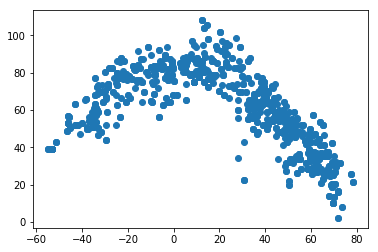

In [80]:
plt.scatter (x,y)

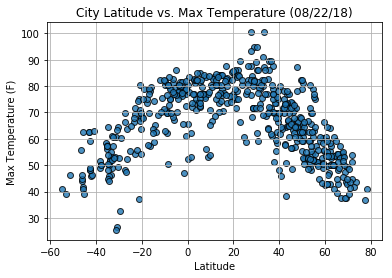

#### Latitude vs. Humidity Plot

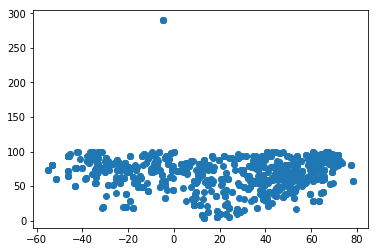

In [81]:
#latitude
x = lats
y = humidities
plt.scatter (x,y)

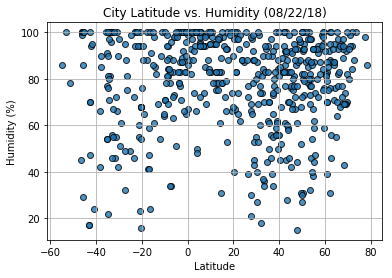

#### Latitude vs. Cloudiness Plot

In [121]:
#latitude
x = lats

In [124]:
# cloudiness
y = cloudinesses

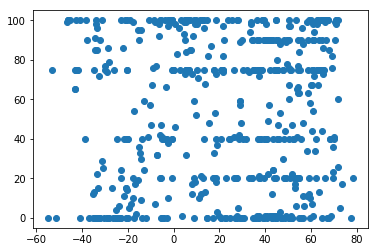

In [123]:
plt.scatter (x,y)

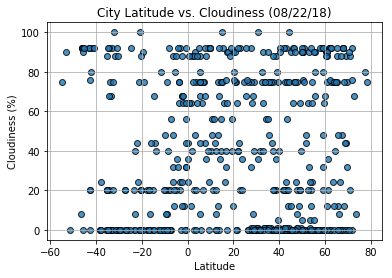

#### Latitude vs. Wind Speed Plot

In [89]:
#latitude
x = lats

In [90]:
# wind speed
y = wind_speeds

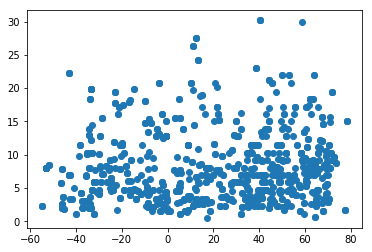

In [91]:
plt.scatter(x,y)

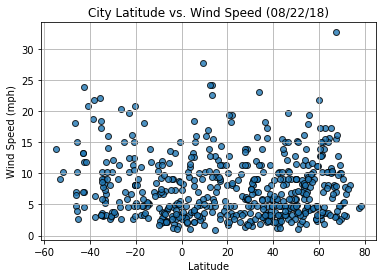